# Preliminary

This notebook is specially designed for John. This will serve to test examples with low resolution images with slanted lines. First, we will teach how to generate low resolution images, explaining the possible parameters to vary. Then, we will teach how to load the image into a high resolution image. Subsequently, we will teach how to generate a slanted Gaussian 2D kernel and then convolve it with the high resolution image.

All this is possible in this notebook. John can vary parameters and test the process as desired. 

To run each cell of code, just press the `Run` button or press `control + enter`.

# Slant white lines

This is the low resolution image, for which we will use the method `get_slant_lines`. To use this method we only have to configure the following parameters, which we will also explain

- size = low res image size (width, height)
- angle = angle in degree for slant the lines (respect to the y axis)
- pitch = in pixels
- grey_level = `0%` means white and `100%` means all black
- color = can be `white`, `red`, `blue` or `green` as desired
- border = tuple of 4 values means border weight (left, rigth, top, bottom)
- outside = `True` (border outside) or `False` (border inside) 

Here there is an example. You can set as you desired

In [ ]:
from lenticular_imaging import get_slant_lines, saving_image

# parameters

size = 100, 100
angle = 45
pitch = 10
grey_level = 90
color = 'white'
border = (50, 10, 5, 5)
outside = True

# getting the image with slant lines

image = get_slant_lines(size, angle, pitch, grey_level, color=color, border=border, outside=outside)

# saving the image

lr_name = 'input/test_john.png'
saving_image(image, lr_name)

So when executing this code, we can see a vervose announcing that the image was saved. Next, we load the image and show it for verification

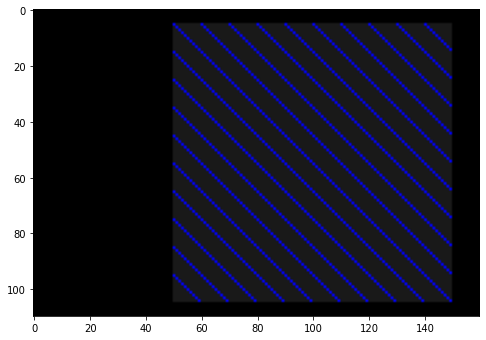

In [19]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

# - load the low res (LR) image

lr_name = 'input/test_john.png'
lr_image = cv.imread(lr_name)
lr_image = cv.cvtColor(lr_image, cv.COLOR_BGR2RGB)

# - show the LR image

plt.figure(figsize=(8,8))
plt.imshow(lr_image)
plt.show()

# Load the low res image into the high res image

we first show the input csv file that we have defined

In [12]:
import pandas as pd

csv_input = 'input/test_john.csv'
df = pd.read_csv(csv_input)

df

,input name,output name,resolution,pixel size,pixel shift,blue xy,green xy,red xy,blue size,green size,red size,border
0,test_border.png,test_border.png,10,(231 231),1,(0 0),(77 0),(22 108),(55 89),(132 89),(141 104),(0 0 0 0)


We can notice how the resolution parameter was setted to 10 um. Then, we hope that the pixel size is aproximaly `23x23` where each pixel have a 10 um of resolution. Now we show the load of the high resolution image

We will use the `get_high_res_image` method with the csv input file to load the high res image

In [20]:
import numpy as np
from lenticular_imaging import get_high_res_image, saving_images

# - load the LR image onto a HR image

hr_image, save_name = get_high_res_image(csv_input)

# - saving HR image

saving_images(hr_image, save_name)

 
loading the RGB image: test_border.png...
saving image as: output/test_border.png ...
done


With the vervose, we notice that the image was saved. Now we load that image and show it

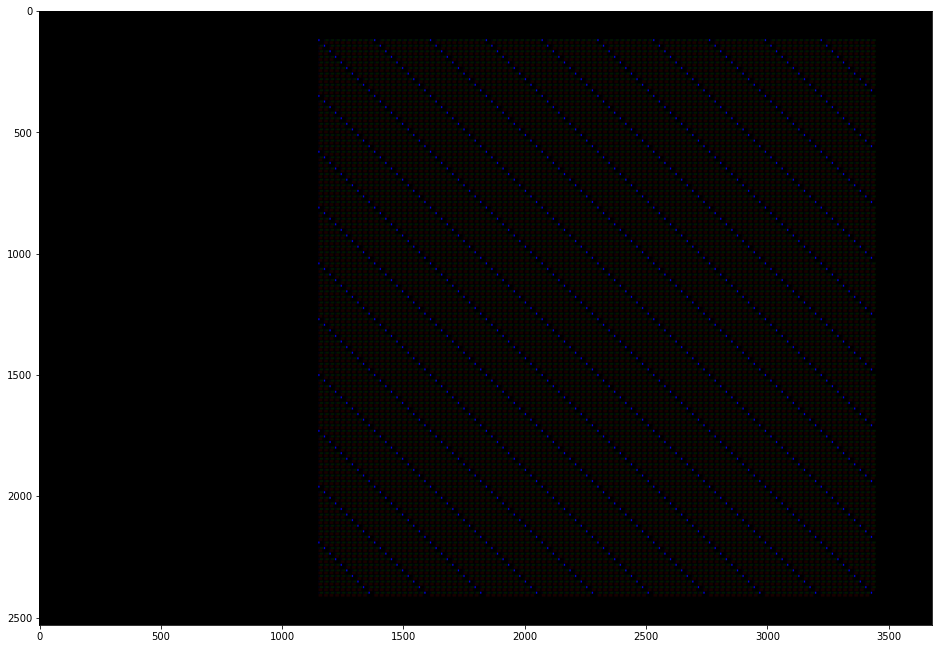

In [21]:
import cv2 as cv
import matplotlib.pyplot as plt

# - load HR image

hr_image = cv.imread('output/test_border.png')
hr_image = cv.cvtColor(hr_image, cv.COLOR_BGR2RGB)

# - show the image

plt.figure(figsize=(16,16))
plt.imshow(hr_image)
plt.show()

# Slanted 2D Gaussian kernel generation

To generate this kernel, we have added a special method to our tool kit, which we have named `get_slant_2D_gaussian_kernel`. This method has four input parameters, which are explained below:

- `xstd`: float means the std in x direccion
- `ystd`: float means std in y direccion. If it is not given, then `ystd` is a `10 %` of `xstd`
- `size`: touple means the size in (x, y) directions, equivalent to (width, height)
- `angle`: float means the slant angle (in degrees) for the 2D gaussian (respect to the y axis)

Next we generate a kernel adapted to the case of the image that we have previously loaded. It is important to remember that the pixel size (for the RGB pattern used) now is `23x23`, the angle of inclination of the lines was `45°` and the pitch between the lines was defined at `10 pixels`. It is important because these parameters define the characteristics of the kernel

We will use the following criteria:

- `xstd`: half the width of a pixel `23/2`
- `ystd`: `10 %` of `xstd`
- `size`: pixel size in high res `23x23`
- `angle`: slant angle used for the white lines (`45°`)

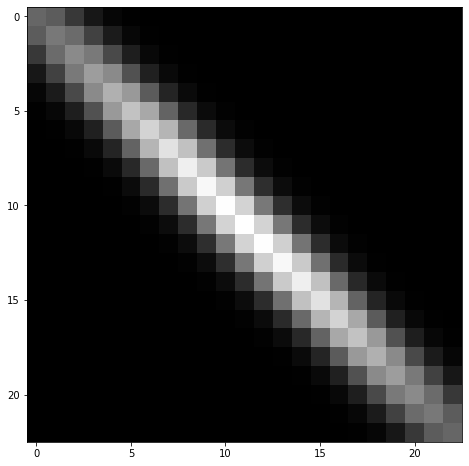

In [15]:
from lenticular_imaging import get_slant_2D_gaussian_kernel

# - define kernel parameters

pixel_size = 23
xstd = pixel_size / 2
ystd = xstd * (10/100)
size = pixel_size, pixel_size
angle = 45

# - get the kernel

kernel = get_slant_2D_gaussian_kernel(xstd=xstd, ystd=ystd, size=size, angle=angle)

# - show the kernel

plt.figure(figsize=(8,8))
plt.imshow(kernel, cmap='gray', interpolation='none')
plt.show()

# High Resolution Image Convolution

To perform this task, we have developed and added a special method to our tool kit, which we have named `convolve_method1`. This method has two input parameters and one optional parameter, which are explained below:

- `src`: string with path and file name of an input image (hig res image in this case)
- `kernel`: a desired kernel (slant 2D gaussian kernel in this case)
- `brightness`: percentage of brightness desired for the output image, relative to the brightness of the input image
- `delta`: delta which could cause crosstalk (optional)

Next we are going to convolve the high resolution image previously loaded with the 2D kernel that we have generated.

**NOTE:** the RMSE of comparisson between the original high res image and its convolved version is calculated with a method that we alse added into our tool kit named RMSE. This one compute the RMSE and return it in dB. Next, We will use that method to compute the RMSE and we display it in the title of figure

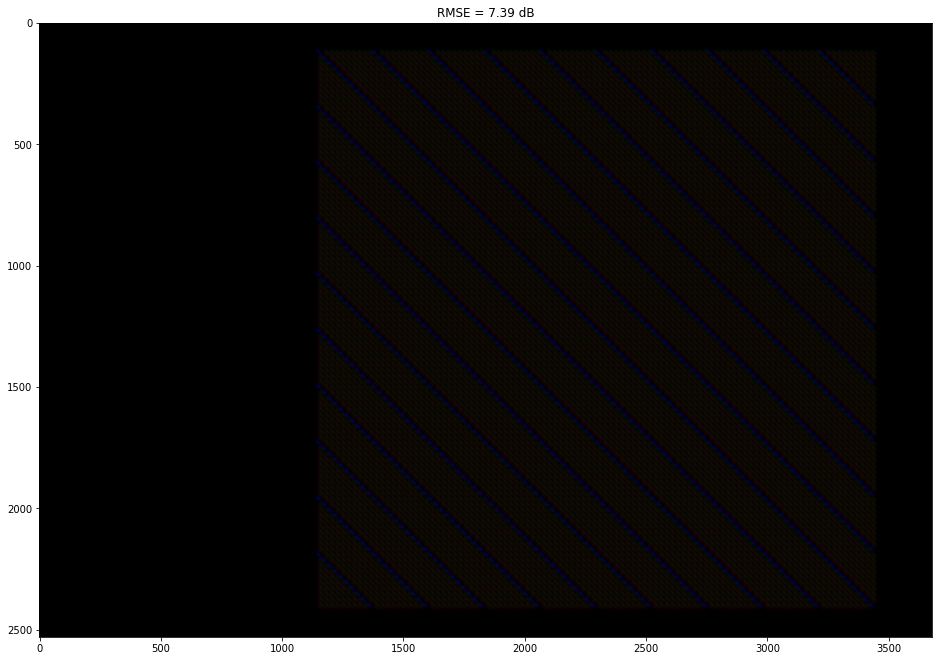

In [22]:
from lenticular_imaging import convolve_method1, RMSE

# - convolution process

src = 'output/test_border.png' 
convolved = convolve_method1(src, kernel, brightness=80)

# - Compute the RMSE

rmse = RMSE(hr_image, convolved)

#- show the output

plt.figure(figsize=(16,16))
plt.imshow(convolved)
plt.title('RMSE = %.2f dB' %( rmse ) )
plt.show()

## Making a zoom

Here we will zoom in on the input and output images to observe in more detail what happens to the pixels.

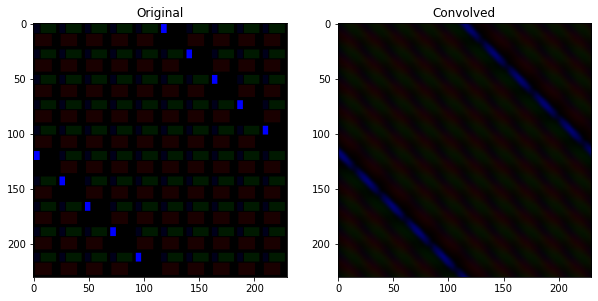

In [23]:
start = 23*50 # at the tenth pixel
end = start + 23*10   # view five pixels
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(hr_image[start:end, start:end, :]),plt.title('Original')
# plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(convolved[start:end, start:end, :]),plt.title('Convolved')
# plt.xticks([]), plt.yticks([])
plt.show()

We have shown a zoom of only 5 pixels. It is easy to note how the position of first pixel we want to see is the tenth pixel and there is a black space indicating that we take a column black of the border edge. Note alse that since pixel size is `23x23` the zoom have `115x115` pixels